<a href="https://colab.research.google.com/github/Puneesha77/ML-Exercise-/blob/main/MLCW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#insall Kaggle
!pip install kaggle


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"puneeshaperera","key":"65b035943e46735a5e6d7be49f486106"}'}

In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("jeyasrisenthil/hand-signs-asl-hand-sign-data")

print("Path to dataset files:", path)


100%|██████████| 17.5M/17.5M [00:00<00:00, 74.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data/versions/1


In [ ]:
import os

# path returned by kagglehub
dataset_path = path  # e.g., ~/.kagglehub/jeyasrisenthil/hand-signs-asl-hand-sign-data

# List all files and folders
for root, dirs, files in os.walk(dataset_path):
    print("Folder:", root)
    print("Files:", files[:10])  # print first 10 files in each folder
    print()


Folder: /root/.cache/kagglehub/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data/versions/1
Files: []

Folder: /root/.cache/kagglehub/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data/versions/1/DATASET
Files: []

Folder: /root/.cache/kagglehub/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data/versions/1/DATASET/K
Files: ['image_1681461291.228149.jpg', 'image_1681461277.1521957.jpg', 'image_1681461387.6492372.jpg', 'image_1681461216.723309.jpg', 'image_1681461332.1286871.jpg', 'image_1681461381.371818.jpg', 'image_1681461395.086873.jpg', 'image_1681461401.4421513.jpg', 'image_1681461244.1813595.jpg', 'image_1681461219.5664732.jpg']

Folder: /root/.cache/kagglehub/datasets/jeyasrisenthil/hand-signs-asl-hand-sign-data/versions/1/DATASET/0
Files: ['image_1681392988.5740635.jpg', 'image_1681393160.7460952.jpg', 'image_1681392945.9290903.jpg', 'image_1681393184.638091.jpg', 'image_1681392958.561848.jpg', 'image_1681393109.4386442.jpg', 'image_1681392968.506309.jpg', 'image_16813

In [8]:
# Import all necessary libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import cv2
import zipfile
import shutil
from collections import Counter


In [9]:
# Deep Learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [10]:
# Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder


In [11]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("📦 All packages imported successfully!")
print(f"🔥 TensorFlow version: {tf._version_}")
print(f"🔢 GPU Available: {tf.test.is_gpu_available()}")

📦 All packages imported successfully!


AttributeError: module 'tensorflow' has no attribute '_version_'

In [12]:
# Utilities
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import tensorflow as tf

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("📦 All packages imported successfully!")
print(f"🔥 TensorFlow version: {tf.__version__}")

# Check GPU availability
gpus = tf.config.list_physical_devices('GPU')
print(f"🔢 GPU Available: {len(gpus) > 0}")


📦 All packages imported successfully!
🔥 TensorFlow version: 2.19.0
🔢 GPU Available: False


In [14]:
# 'path' is returned by kagglehub.dataset_download()
dataset_path = path  # use the actual returned path

# List subfolders (class labels)
labels = os.listdir(dataset_path)
print("Classes found:", labels)

# Check number of images per class
for label in labels:
    label_path = os.path.join(dataset_path, label)
    if os.path.isdir(label_path):  # only count folders
        print(f"{label}: {len(os.listdir(label_path))} images")


Classes found: ['DATASET']
DATASET: 36 images


In [15]:
import os
import shutil

dataset_path = path
organized_path = "dataset_organized"
os.makedirs(organized_path, exist_ok=True)

for img_file in os.listdir(dataset_path):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        label = img_file[0].upper()  # first letter as label
        label_path = os.path.join(organized_path, label)
        os.makedirs(label_path, exist_ok=True)
        shutil.copy(os.path.join(dataset_path, img_file), os.path.join(label_path, img_file))

print("Images organized by class in:", organized_path)


Images organized by class in: dataset_organized


In [16]:
import shutil

all_images_folder = os.path.join(dataset_path, "DATASET")  # adjust if needed
organized_path = "dataset_organized"
os.makedirs(organized_path, exist_ok=True)

for img_file in os.listdir(all_images_folder):
    if img_file.endswith(".jpg") or img_file.endswith(".png"):
        label = img_file[0].upper()  # first letter as label
        label_path = os.path.join(organized_path, label)
        os.makedirs(label_path, exist_ok=True)
        shutil.copy(os.path.join(all_images_folder, img_file), os.path.join(label_path, img_file))

print("Images organized by class in:", organized_path)


Images organized by class in: dataset_organized


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,        # scale pixel values to [0,1]
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    "dataset_organized",   # path to organized dataset
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "dataset_organized",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [18]:
import os

print(os.getcwd())  # current working directory
print(os.listdir("dataset_organized"))  # list contents of your folder


/content
[]


In [19]:
from google.colab import files
import zipfile
import os

# Upload the ZIP file
uploaded = files.upload()  # select your ZIP file

# Get the uploaded file name (it will be the first key in the dictionary)
zip_filename = list(uploaded.keys())[0]

# Extract the ZIP file
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall("/content/dataset")  # choose your extraction folder

print("Files extracted to /content/dataset")
print(os.listdir("/content/dataset"))


Saving archive (1).zip to archive (1).zip
Files extracted to /content/dataset
['DATASET']


In [20]:
import os

print(os.listdir("/content/dataset"))


['DATASET']


In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    "/content/dataset",   # path to your dataset
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "/content/dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 720 images belonging to 1 classes.
Found 180 images belonging to 1 classes.


In [22]:
train_gen = datagen.flow_from_directory(
    "/content/dataset_organized",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "/content/dataset_organized",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    "/content/dataset",   # path to your dataset
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    "/content/dataset",
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 720 images belonging to 1 classes.
Found 180 images belonging to 1 classes.


In [24]:
dataset_path = "/content/dataset/DATASET"



In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,  # 20% for validation
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)


Found 720 images belonging to 36 classes.
Found 180 images belonging to 36 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(36, activation='softmax')  # 36 classes
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 687,844 (2.62 MB)

 Trainable params: 687,844 (2.62 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=25  # Start with 25, can adjust later
)



Epoch 1/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 8s 267ms/step - accuracy: 0.0286 - loss: 3.6251 - val_accuracy: 0.0444 - val_loss: 3.5837
Epoch 2/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 311ms/step - accuracy: 0.0287 - loss: 3.5834 - val_accuracy: 0.0444 - val_loss: 3.5831
Epoch 3/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 250ms/step - accuracy: 0.0187 - loss: 3.5844 - val_accuracy: 0.0278 - val_loss: 3.5819
Epoch 4/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 309ms/step - accuracy: 0.0468 - loss: 3.5812 - val_accuracy: 0.0278 - val_loss: 3.5702
Epoch 5/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.0303 - loss: 3.5722 - val_accuracy: 0.0500 - val_loss: 3.5065
Epoch 6/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 296ms/step - accuracy: 0.0336 - loss: 3.5333 - val_accuracy: 0.0889 - val_loss: 3.4199
Epoch 7/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 7s 316ms/step - accuracy: 0.0362 - loss: 3.4928 - val_accuracy: 0.0500 - val_loss: 3.3714
Epoch 8/25
23/23 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.0659 - loss: 3.4565 - val_accuracy: 0

In [28]:
loss, acc = model.evaluate(val_gen)
print(f'Validation Accuracy: {acc*100:.2f}%')


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.3061 - loss: 2.1260 
Validation Accuracy: 30.56%


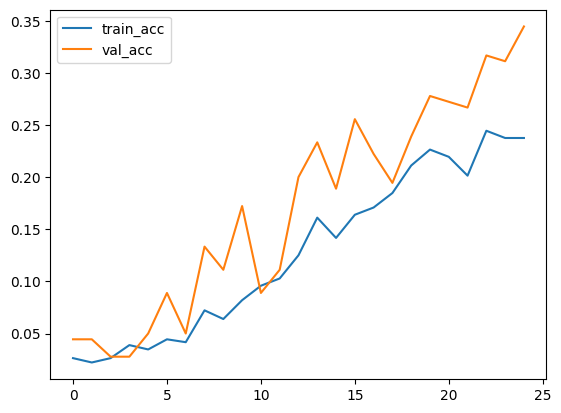

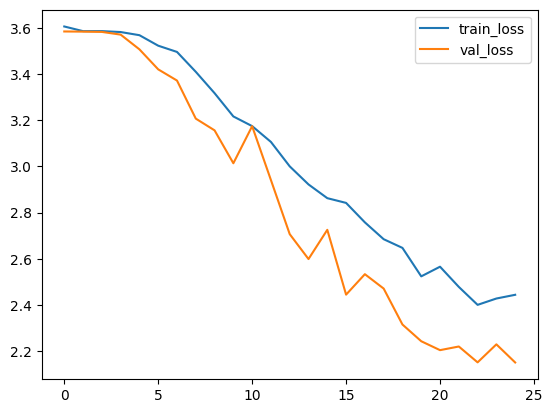

In [29]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


In [31]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/dataset/DATASET/0/image_1681392938.561891.jpg' # single hand gesture image

img = image.load_img(img_path, target_size=(64,64))
img_array = image.img_to_array(img)/255.0
img_array = np.expand_dims(img_array, axis=0)  # make it batch size 1

pred = model.predict(img_array)
class_index = np.argmax(pred)
print(f'Predicted class: {class_index}')  # Map index to class name from train_gen.class_indices



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Predicted class: 0


In [33]:
model.save('hand_gesture_model.keras')



In [34]:
from tensorflow.keras.models import load_model

model = load_model('hand_gesture_model.keras')


In [36]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = '/content/dataset/DATASET/0/image_1681392945.9290903.jpg' # example image
img = image.load_img(img_path, target_size=(64,64))
img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)


In [37]:
pred = model.predict(img_array)
class_index = np.argmax(pred)
class_labels = {v: k for k, v in train_gen.class_indices.items()}
print(f'Predicted gesture: {class_labels[class_index]}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Predicted gesture: 0


In [38]:
import os

folder_path = '/content/dataset/DATASET/0'
for file in os.listdir(folder_path):
    img_path = os.path.join(folder_path, file)
    img = image.load_img(img_path, target_size=(64,64))
    img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
    pred = model.predict(img_array)
    class_index = np.argmax(pred)
    print(file, class_labels[class_index])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
image_1681392988.5740635.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
image_1681393160.7460952.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
image_1681392945.9290903.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
image_1681393184.638091.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
image_1681392958.561848.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
image_1681393109.4386442.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
image_1681392968.506309.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
image_1681393298.875819.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
image_1681393350.9875703.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
image_1681393068.4097507.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
image_1681393041.6576877.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
image_1681392938.561891.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
image_1681392952.1047366.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
image_1681393124.4695137.jpg 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
i

In [39]:
dataset_path = '/content/dataset/DATASET'
for class_name in os.listdir(dataset_path):
    class_folder = os.path.join(dataset_path, class_name)
    for file in os.listdir(class_folder):
        img_path = os.path.join(class_folder, file)
        img = image.load_img(img_path, target_size=(64,64))
        img_array = np.expand_dims(image.img_to_array(img)/255.0, axis=0)
        pred = model.predict(img_array)
        class_index = np.argmax(pred)
        print(file, "Predicted:", class_labels[class_index], "Actual:", class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
image_1681461291.228149.jpg Predicted: I Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
image_1681461277.1521957.jpg Predicted: Y Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
image_1681461387.6492372.jpg Predicted: L Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
image_1681461216.723309.jpg Predicted: Z Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
image_1681461332.1286871.jpg Predicted: Z Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
image_1681461381.371818.jpg Predicted: R Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
image_1681461395.086873.jpg Predicted: Y Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
image_1681461401.4421513.jpg Predicted: Q Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
image_1681461244.1813595.jpg Predicted: Y Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
image_1681461219.5664732.jpg Predicted: Z Actual: K
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
image_1681461239.642853.jpg Predicted: Q Actual: K
1/1 ━━━━━━━━━━━

In [40]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Get predictions for the whole validation set
val_preds = model.predict(val_gen)
y_pred = np.argmax(val_preds, axis=1)
y_true = val_gen.classes  # actual labels

print(classification_report(y_true, y_pred, target_names=val_gen.class_indices.keys()))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step
              precision    recall  f1-score   support

           0       0.20      0.20      0.20         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         5
           7       0.12      0.20      0.15         5
           8       0.00      0.00      0.00         5
           9       0.00      0.00      0.00         5
           A       0.00      0.00      0.00         5
           B       0.14      0.20      0.17         5
           C       0.00      0.00      0.00         5
           D       0.00      0.00      0.00         5
           E       0.00      0.00      0.00         5
           F       0.00      0.00      0.00         5
           G       0.00      0.00      0.0

In [41]:
from tensorflow.keras.models import load_model
model = load_model('hand_gesture_model.keras')


In [42]:
from tensorflow.keras.models import load_model
import numpy as np
import cv2

# Load trained model
model = load_model("hand_gesture_model.keras")

# Class labels (map index -> class name)
class_labels = {v: k for k, v in train_gen.class_indices.items()}


In [43]:
cap = cv2.VideoCapture(0)  # 0 = default camera

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Preprocess the frame for model
    img = cv2.resize(frame, (64, 64)) / 255.0
    img = np.expand_dims(img, axis=0)

    # Prediction
    pred = model.predict(img)
    class_index = np.argmax(pred)
    label = class_labels[class_index]

    # Show prediction on screen
    cv2.putText(frame, f"Prediction: {label}", (10, 50),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Hand Gesture Recognition", frame)

    # Press 'q' to exit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


In [45]:
model.save("hand_gesture_model.keras")


Downlaoding the model file.

In [46]:
from google.colab import files
files.download("hand_gesture_model.keras")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>